# Barabási-model in Julia
the function named "barabasi" is a Julia implementation of the classical random graph.


In [61]:
function barabasi(m,n_step)
# parameters:
# input:
# m: how many old vertices are chosen at each step? (m>1)
# n_step: number of steps including the initial one
# output:
# edge: an array for storing the edges
# local:
# chosen: for temp storing
# i_edge: the idx of the last edge in edge

    n_edge=(n_step-1)*m+div(m*(m-1),2)
    edge=zeros(Int32,2*n_edge)
    chosen=zeros(Int32,m)
    i_edge=0

    # initial step, inserting a complete m-graph
    for it in 1:(m-1)
        for jt in (it+1):m
            edge[i_edge+=1]=it
            edge[i_edge+=1]=jt
        end
    end
    i_vertex=m

# generating the graf
    for i_step in 2:n_step
# choosing the future neighbours for the new one
        i_m=1
        while i_m<=m
            v=edge[Int(1+floor(i_edge*rand()))]
            it=1
            while it<=i_m
                if chosen[it]==v
                    break
                end
                it+=1
            end
                
            if it>i_m
                chosen[i_m]=v
                i_m+=1
            end
        end
# inserting the new edges
        i_vertex+=1
        for i_m in 1:m
            edge[i_edge+=1]=chosen[i_m]
            edge[i_edge+=1]=i_vertex
        end
    end
    return edge
end

barabasi (generic function with 1 method)

generating the graph with parameters below:

In [97]:
m=3
n_step=30
@time edge=barabasi(m, n_step);


  0.000014 seconds (6 allocations: 1.031 KB)


plotting the degree distribution in loglog scale:

In [98]:
#X: positive integers
#mX: max(X)
function fr3q(X,mX)
    nX=length(X)
    F=zeros(Int32,mX)
    mF=0
    for it in 1:nX
        F[X[it]]+=1
        if F[X[it]] > mF
            mF=F[X[it]]
        end
    end
    return F,mF
end

fr3q (generic function with 1 method)

1.0

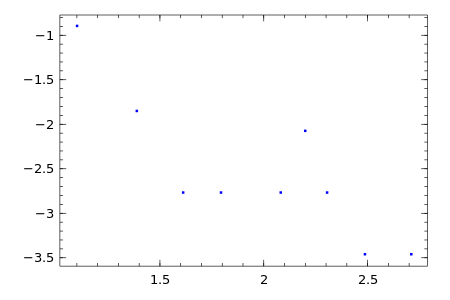

In [104]:
n_edge=(n_step-1)*m+div(m*(m-1),2)
n_vertex=m+n_step-1
#println(edge)
F,mF=fr3q(edge,n_vertex)
#println(F)
F,_=fr3q(F,mF);
#println(F)
poz=F.>0;
x=(1:mF)[poz];
y=F[poz]
print(sum(y/n_vertex))
using Winston
plot(log(x),log(y/n_vertex),".b")

